In [1]:
# !pip install numpy scipy sounddevice

start playing...
finished


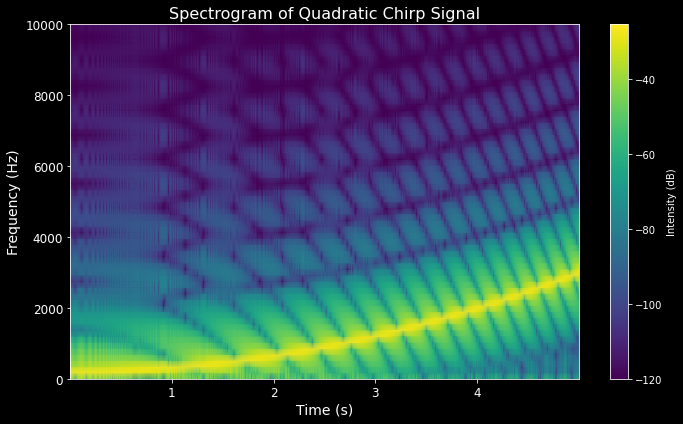

In [2]:
import numpy as np
from scipy.signal import chirp, spectrogram
import matplotlib.pyplot as plt
import sounddevice as sd


duration = 5.0
fs = 44100
t = np.linspace(0, duration, int(fs * duration), endpoint=False)


f0 = 200
f1 = 3000
signal = chirp(t, f0=f0, f1=f1, t1=duration, method='quadratic')
signal /= np.max(np.abs(signal))


print("start playing...")
sd.play(signal, samplerate=fs)
sd.wait()
print("finished")


f, t_spec, Sxx = spectrogram(signal, fs=fs)


plt.style.use('dark_background')  
plt.figure(figsize=(10, 6))
plt.pcolormesh(t_spec, f, 10 * np.log10(Sxx + 1e-12), shading='gouraud', cmap='viridis')


plt.xlabel('Time (s)', color='white', fontsize=14)
plt.ylabel('Frequency (Hz)', color='white', fontsize=14)
plt.title('Spectrogram of Quadratic Chirp Signal', color='white', fontsize=16)
plt.colorbar(label='Intensity (dB)')


plt.ylim(0, 10000)


plt.tick_params(axis='both', colors='white', labelsize=12)

plt.tight_layout()
plt.show()


In [3]:
# !pip install vmdpy


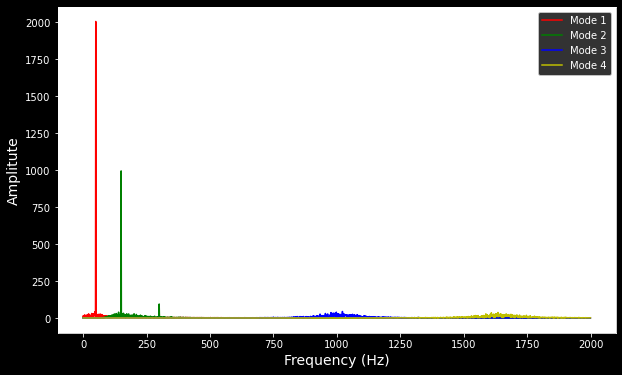

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import vmdpy


T = 1.0             
fs = 4000           
t = np.linspace(0, T, int(fs * T), endpoint=False)


f1, f2, f3 = 50, 150, 300   
signal = np.sin(2 * np.pi * f1 * t) \
       + 0.5 * np.sin(2 * np.pi * f2 * t) \
       + 0.2 * np.sin(2 * np.pi * f3 * t)


noise_amplitude = 0.3
signal_noisy = signal + noise_amplitude * np.random.randn(len(signal))


alpha = 2000.   
tau = 0.        
K = 4          
DC = 0           
init = 1        
tol = 1e-7      


u, u_hat, omega = vmdpy.VMD(signal_noisy, alpha, tau, K, DC, init, tol)



plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b','y']  

for i in range(K):
    mode = u[i, :]
    
    fft_mode = np.fft.fft(mode)
    freq = np.fft.fftfreq(len(mode), d=1/fs)
    
    positive_idx = freq >= 0
    plt.plot(freq[positive_idx], np.abs(fft_mode)[positive_idx], 
             color=colors[i], label=f'Mode {i+1}')


plt.xlabel('Frequency (Hz)', fontsize=14, color='white')
plt.ylabel('Amplitute', fontsize=14, color='white')

plt.legend()
plt.grid(True)


plt.gca().set_facecolor('white')

plt.show()
